In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [38]:
DISPLAY = False
class RandomSurfer:
    '''
        Simulates Random Surfer for comparing with PageRank Simulation
    '''
    
    def __init__(self, N=30, p=0.05, alpha = 0.85, n_steps=100):
        '''
            Initializing and creating a new graph
            
            Input:
            
            * N (int) The number of nodes in the graph default:30
            
            * p (float) The probability of forming an edge. default:0.05
            
            * alpha (float) Proability of random walk vs random jump. default:0.85
            
            * n_steps (int) The number of steps for simulation
        '''
        self.g = nx.erdos_renyi_graph(N, p, directed=True, seed=123)
        
        self.N = N
        self.alpha = alpha
        self.n_steps = n_steps
        
        # Internal attributes
        self.random_surfer_walks = [0 for _ in range(N)]
        
        self.time_steps = 0 # Number of steps the surfers has moved
        
        self.page_rank_scores = np.array([value for value in nx.pagerank(self.g).values()])
        # Stores the actual pagerank scores for graphs
        
        self.arr_errors = [] # Stores error after random surfer and Page Rank's scores
        
        self.current_node = np.random.choice(N) 
        # Randomly initializing the current node for the first iteration
    
    
    def display(self, visualization=0):
        '''
            Displays the current graph with numbers
            
            Input:
            
            * visulization (string) Shows the color variation due to page rank or current 
                random surfer walk scores
                Options:
                 * 0 -> does not show color variation
                 * 1 -> shows color variation based on page rank
                 * 2 -> shows color variation based on current random scores
        '''
        if visualization == 1:
            nx.draw(self.g, cmap=plt.get_cmap('Greens'), 
                    node_color=self.page_rank_scores, 
                    pos=nx.kamada_kawai_layout(self.g),
                    with_labels=True, font_color='black')
            title = 'Node Graph with color variation showing ranking of page'
        elif visualization == 2:
            nx.draw(self.g, cmap=plt.get_cmap('Greens'), 
                    node_color=self.calc_scores(), 
                    pos=nx.kamada_kawai_layout(self.g),
                    with_labels=True, font_color='black')
            title = 'Node Graph with color variation showing ranking of page'
        else:
            nx.draw(self.g,
                    pos=nx.kamada_kawai_layout(self.g),
                    with_labels=True)
            title = 'Node Graph with color variation showing ranking of page'
        
        plt.title(title)
        plt.show()
    
    def move(self):
        '''
            Moves random surfer to another node based on its neighbors and alpha
            
            Output:
            
            next_node (int) The pointer of next node to move
        '''
        if np.random.uniform() <= self.alpha:
            # Move to a neighbor if rand <= alpha
            neighbors = [edge[1] for edge in list(self.g.edges(self.current_node))]
            
            # if no out going neighbors pick any nodes randomly
            if len(neighbors) == 0:
                next_node = np.random.choice(self.N)
            else:
                next_node = np.random.choice(neighbors)
                
        else:
            # Move to a random node in the network if rand < (1-alpha) or rand > alpha
            next_node = np.random.choice(self.N)
        
        return next_node
    
    
    def simulate(self, steps_display_graph = 5):
        '''
            Simulates the random surfer by moving it to new nodes
            
            Inputs:
            
            * steps_display_graph (int) Number of iterations to show current status of
                ranking for the graphs
        '''
        for i in range(self.n_steps):
            # For each times steps
            self.time_steps += 1
            self.current_node = self.move()
            self.random_surfer_walks[self.current_node] += 1
            self.arr_errors.append(self.calc_error())   
        
            if DISPLAY:
                if i % steps_display_graph == 0:
                    print('Status at iteration: ', i)
                    self.display(2)
    
    def calc_scores(self):
        '''
            Calculates the current PageRank score of the random surfer
            
            Output:
            (array) With scores of each node at the current stage
        '''
        if sum(self.random_surfer_walks) == 0:
            # If first iteration, every page is ranked 1/N
            return np.array(self.random_surfer_walks) + (1/self.N)
        return np.array(self.random_surfer_walks)/self.time_steps
    
    def calc_error(self):
        '''
            Calculates the error between the current random surfer scores and 
            acutal page_rank_scores using absolute difference
            
            Output:
            
            * (float)Absolute difference between current node scores given by random walks
                  and actual page rank scores
        '''
        return np.average(np.abs(self.page_rank_scores - self.calc_scores()))

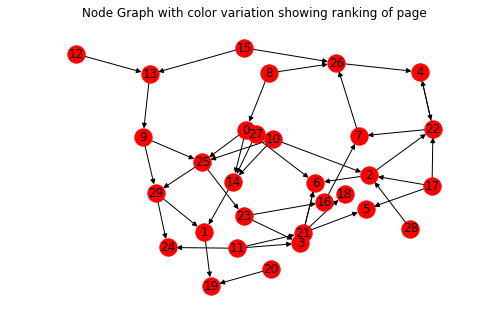

Page Rank Results


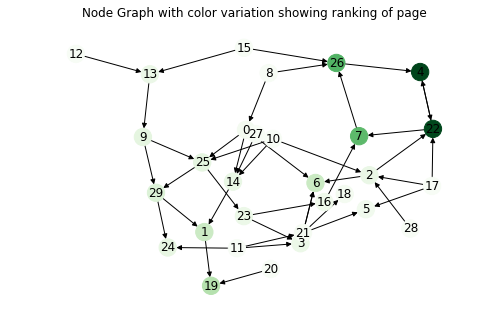

Initial Results by Random Surfing


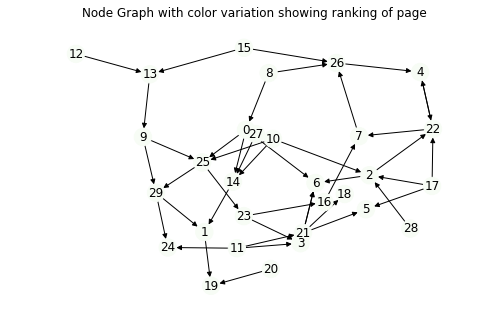

In [39]:
rsurfer = RandomSurfer(n_steps=100)

rsurfer.display()

print('Page Rank Results')
rsurfer.display(1)

print('Initial Results by Random Surfing')
rsurfer.display(2)

Status at iteration:  0


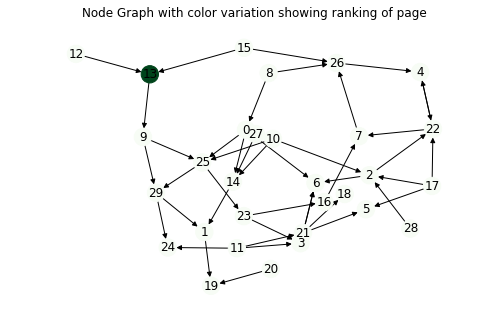

Status at iteration:  20


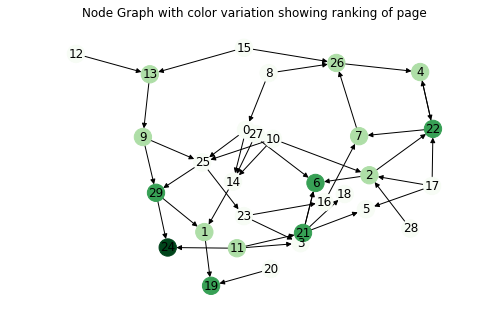

Status at iteration:  40


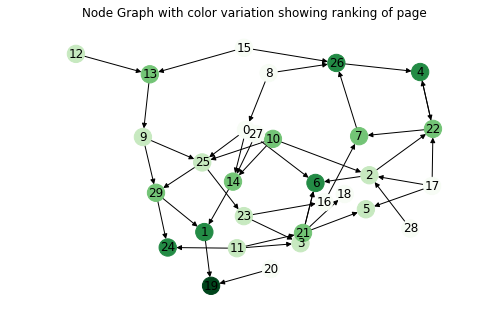

Status at iteration:  60


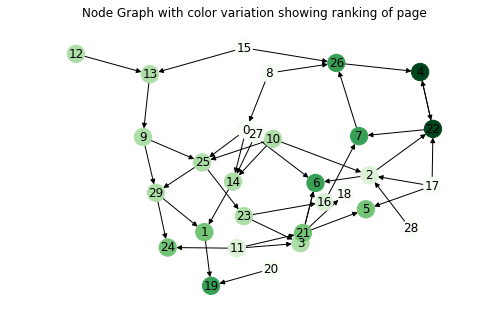

Status at iteration:  80


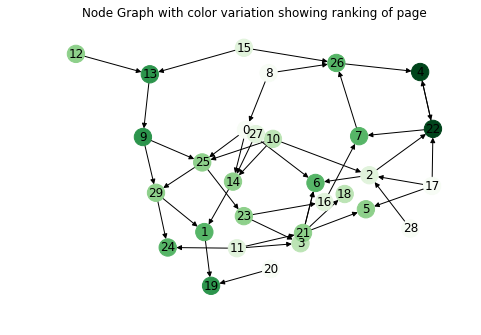

In [40]:
DISPLAY=True
rsurfer.simulate(20)

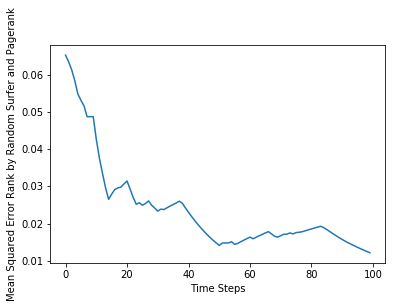

In [41]:
## Ploting error changes as the number of simulation increases
plt.plot(range(rsurfer.time_steps), rsurfer.arr_errors)
plt.xlabel('Time Steps')
plt.ylabel('Mean Squared Error Rank by Random Surfer and Pagerank')
plt.show()